# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Mushlih Nur Islam
- **Email:** mushlih.nuris@gmail.com
- **ID Dicoding:** mushlih_nur_islam_AGiN

## Menentukan Pertanyaan Bisnis

- Produk atau kategori produk apa yang paling laris?
- Apakah ada hubungan antara ulasan pelanggan (rating) dengan jumlah produk yang terjual?
- Di mana lokasi geografis dengan konsentrasi pelanggan tertinggi?

## Import Semua Packages/Library yang Digunakan

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [81]:
customer_df = pd.read_csv("data/customers_dataset.csv")
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [82]:
geolocation_df = pd.read_csv("data/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [83]:
order_items_df = pd.read_csv("data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [84]:
order_payments_df = pd.read_csv("data/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [85]:
order_reviews_df = pd.read_csv("data/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [86]:
orders_df = pd.read_csv("data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [87]:
product_category_name_translation_df = pd.read_csv("data/product_category_name_translation.csv")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [88]:
products_df = pd.read_csv("data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [89]:
sellers_df = pd.read_csv("data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


#### Insight:
- Berdasarkan hasil pengumpulan data yang telah dilakukan, terdapat keterkatitan antar tabel seperti tabel `customer_dataset.csv`, `orders_dataset.csv`, `order_items_dataset.csv`. Dari dataset tersebut kita dapat mengetahui produk atau kategori mana yang paling banyak dibeli
- Kita juga bisa mengetahui jenis pembayaran yang digunakan oleh customer dari `order_payments_dataset.csv`.

### Assessing Data

#### Menilai Tabel `customers_df`

In [90]:
print("Info DataFrame:")
print(customer_df.info())

print("\nJumlah Nilai yang Hilang:")
print(customer_df.isna().sum())

print("\nJumlah Baris Duplikat:")
print(customer_df.duplicated().sum())

print("\nStatistik Deskriptif:")
print(customer_df.describe())

Info DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

Jumlah Nilai yang Hilang:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Jumlah Baris Duplikat:
0

Statistik Deskriptif:
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%         

#### Menilai Tabel `geolocation_df`

In [91]:
print("Info DataFrame:")
print(geolocation_df.info())

print("\nJumlah Nilai yang Hilang:")
print(geolocation_df.isna().sum())

print("\nJumlah Baris Duplikat:")
print(geolocation_df.duplicated().sum())

print("\nStatistik Deskriptif:")
print(geolocation_df.describe())

Info DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None

Jumlah Nilai yang Hilang:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Jumlah Baris Duplikat:
261831

Statistik Deskriptif:
       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     

#### Menilai Tabel `order_items_df`

In [92]:
print("Info DataFrame:")
print(order_items_df.info())

print("\nJumlah Nilai yang Hilang:")
print(order_items_df.isna().sum())

print("\nJumlah Baris Duplikat:")
print(order_items_df.duplicated().sum())

print("\nStatistik Deskriptif:")
print(order_items_df.describe())

Info DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None

Jumlah Nilai yang Hilang:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Jumlah Baris Duplikat:
0

Statistik Deskriptif:
       order_item_id          price  freight_value
count  112650.000000  112650.0000

#### Menilai Tabel `order_payments_df`

In [93]:
print("Info DataFrame:")
print(order_payments_df.info())

print("\nJumlah Nilai yang Hilang:")
print(order_payments_df.isna().sum())

print("\nJumlah Baris Duplikat:")
print(order_payments_df.duplicated().sum())

print("\nStatistik Deskriptif:")
print(order_payments_df.describe())

Info DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None

Jumlah Nilai yang Hilang:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Jumlah Baris Duplikat:
0

Statistik Deskriptif:
       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584          

#### Menilai Tabel `order_reviews_df`

In [94]:
print("Info DataFrame:")
print(order_reviews_df.info())

print("\nJumlah Nilai yang Hilang:")
print(order_reviews_df.isna().sum())

print("\nJumlah Baris Duplikat:")
print(order_reviews_df.duplicated().sum())

print("\nStatistik Deskriptif:")
print(order_reviews_df.describe())

Info DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None

Jumlah Nilai yang Hilang:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Jumlah Baris Duplikat:
0

Statistik Deskriptif:
       review_score
coun

#### Menilai Tabel `orders_df`

In [95]:
print("Info DataFrame:")
print(orders_df.info())

print("\nJumlah Nilai yang Hilang:")
print(orders_df.isna().sum())

print("\nJumlah Baris Duplikat:")
print(orders_df.duplicated().sum())

print("\nStatistik Deskriptif:")
print(orders_df.describe())

Info DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None

Jumlah Nilai yang Hilang:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_

#### Menilai Tabel `product_category_name_translation_df`

In [96]:
print("Info DataFrame:")
print(product_category_name_translation_df.info())

print("\nJumlah Nilai yang Hilang:")
print(product_category_name_translation_df.isna().sum())

print("\nJumlah Baris Duplikat:")
print(product_category_name_translation_df.duplicated().sum())

print("\nStatistik Deskriptif:")
print(product_category_name_translation_df.describe())

Info DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None

Jumlah Nilai yang Hilang:
product_category_name            0
product_category_name_english    0
dtype: int64

Jumlah Baris Duplikat:
0

Statistik Deskriptif:
       product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1


#### Menilai Tabel `products_df`

In [97]:
print("Info DataFrame:")
print(products_df.info())

print("\nJumlah Nilai yang Hilang:")
print(products_df.isna().sum())

print("\nJumlah Baris Duplikat:")
print(products_df.duplicated().sum())

print("\nStatistik Deskriptif:")
print(products_df.describe())

Info DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None

Jumlah Nilai yang Hilang:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty           

#### Menilai Tabel `sellers_df`

In [98]:
print("Info DataFrame:")
print(sellers_df.info())

print("\nJumlah Nilai yang Hilang:")
print(sellers_df.isna().sum())

print("\nJumlah Baris Duplikat:")
print(sellers_df.duplicated().sum())

print("\nStatistik Deskriptif:")
print(sellers_df.describe())

Info DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None

Jumlah Nilai yang Hilang:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Jumlah Baris Duplikat:
0

Statistik Deskriptif:
       seller_zip_code_prefix
count             3095.000000
mean             32291.059451
std              32713.453830
min               1001.000000
25%               7093.500000
50%              14940.000000
75%              64552.500000
max              99730.000000


#### Insight:
- Dari hasil penilaian data yang telah dikumpulkan, beberapa dataset sudah bagus dengan tidak banyak dataset yang memiliki duplikasi data dan data yang hilang juga tidak terlalu banyak.
- Untuk format data yang berada di dataset juga sebagian besar sudah sesuai dan hanya perlu sedikit perbaikan untuk beberapa dataset.

### Cleaning Data

#### Membersikhkan Tabel `customers_df`

In [99]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


#### Membersikhkan Tabel `geolocation_df`

In [100]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [101]:
geolocation_df.duplicated().sum()
geolocation_df.drop_duplicates(inplace=True)

In [102]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


#### Membersikhkan Tabel `order_items_df`

In [103]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


#### Membersikhkan Tabel `order_payments_df`

In [104]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


#### Membersikhkan Tabel `order_reviews_df`

In [105]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [106]:
order_reviews_df.fillna({
    'review_comment_title': "",
    'review_comment_message': "",
}, inplace=True)

In [107]:
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [108]:
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])

In [109]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


#### Membersikhkan Tabel `orders_df`

In [110]:
orders_df.fillna({
    'order_approved_at': "",
    'order_delivered_carrier_date': "",
    'order_delivered_customer_date': ""
}, inplace=True)

In [111]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [112]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

In [113]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


#### Membersihkan Tabel `product_category_name_translation_df`

In [114]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


#### Membersihkan Tabel `products_df`

In [115]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [116]:
products_df.fillna({
    'product_category_name': "",
    'product_name_lenght': 0,
    'product_description_lenght': 0,
    'product_photos_qty': 0,
    'product_weight_g': 0,
    'product_length_cm': 0,
    'product_height_cm': 0,
    'product_width_cm': 0
}, inplace=True)

In [117]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [118]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [119]:
products_df = products_df.drop(
    columns=[
        "product_name_lenght",
        "product_description_lenght",
        "product_photos_qty",
        "product_weight_g",
        "product_length_cm",   
        "product_height_cm",   
        "product_width_cm",   
    ]
)
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32951 non-null  object
 1   product_category_name  32951 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB


#### Membersihkan Tabel `sellers_df`

In [120]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


#### Insight:
- Berdasarkan hasil pemahaman pada bagian Assessing Data sebelumya, dataset yang masih kurang bagus dan bersih dilakukan proses cleaning dan preprocessing data untuk memperbaiki kualitas data. Dengan mengecek dan menghilangkan data yang tidak valid, mengubah tipe data yang tidak sesuai, dan melakukan pengolahan data lainnya
- Dengan melakukan proses cleaning dan preprocessing data, maka kualitas data akan menjadi lebih baik dan membuat proses selanjutnya lebih mudah dan efektif. Data yang sudah bersih dan siap digunakan akan memungkinkan untuk mendapatkan hasil yang maksimal

## Exploratory Data Analysis (EDA)

### Explore `customers_df`

In [121]:
customer_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
38093,b8314bd695a1b3373a6f434d3d7caac6,6bd41f0cf93d8d32bac60b824e5370e8,99670,ronda alta,RS
792,aa4e13fb69ce0c9e456d9f6bb47d46db,72eadb2fd1950044892dac115617c6a0,75064,anapolis,GO
74127,addaf501d74472c8a4067d75c9606a37,26de5f37a3eed5aa543737695f3ae0c8,49065,aracaju,SE
38345,b68f0151da6430c27ff22bbc6752916e,b372b2391066c4a5024e21b30d62b91d,22710,rio de janeiro,RJ
26980,5db652fa15eeb25ec624e00feae386b2,e040c33e0734aaf73e3c0c216877dc39,3470,sao paulo,SP


In [122]:
customer_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [123]:
customer_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Explore `order_payments_df`

In [124]:
order_payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
26379,bb0053cdec4b5850b4682e029eb3347f,1,credit_card,2,245.86
11075,1428d5591252000b5c73e00f91d4889a,1,credit_card,2,109.65
45971,9a5e2e79294284216bd97c19ba039cfe,1,credit_card,1,92.15
37488,df545fca1d6c9f96b0eeeb751a6f2650,1,boleto,1,115.79
9857,1e0fdb7395b6eab4335b7a41b88813e4,1,credit_card,3,36.78


In [125]:
order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

### Explore `orders_df`

In [126]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
58586,fc94ca74e236e7bad0e7a33cd62dc474,a807bd3f8b7f9925b6eb9d07c0f3387a,delivered,2017-05-08 13:12:30,2017-05-08 13:25:23,2017-05-09 13:27:34,2017-05-23 10:27:42,2017-05-31
62614,de5569837d26b78e94dbcf0d72e29ba2,df26ca4971ed6b416836e89a20d4fe13,delivered,2017-12-18 22:50:21,2017-12-20 06:56:23,2017-12-22 15:09:40,2017-12-23 18:13:35,2018-01-08
81790,42113ccffae542a6aee6b921c765d59e,3e058e34970eeff2a92b7c5f12ff6cdd,delivered,2018-08-03 11:57:55,2018-08-03 12:31:42,2018-08-03 13:56:00,2018-08-07 17:04:44,2018-08-16
66612,81284ce76107a0034192e8eda2129993,eee77690468eb9f1907c1ab83a5d3c8f,delivered,2017-12-22 19:08:08,2017-12-22 19:17:24,2017-12-26 23:25:00,2018-01-03 19:49:05,2018-01-19
12200,3174b803120ff7406c6d04c542a80bfb,dcbedfb087496e64857829044630a2b2,delivered,2018-02-19 15:51:58,2018-02-19 16:55:51,2018-02-20 19:58:57,2018-03-07 17:48:45,2018-03-21


### Explore `customers_df` & `orders_df`

#### Menggabungkan Explore `customers_df` & `orders_df`

In [127]:
customers_orders_df = pd.merge(
    left=customer_df,
    right=orders_df,
    how='left',
    on='customer_id',
)
customers_orders_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
24841,2c127bf706b5089fd5dbdbcb02c7fcbc,aaec5bd8971bcff98276f504acb38929,9683,sao bernardo do campo,SP,3e8de743dd3009df8fc34e0555124ed8,delivered,2017-10-22 20:17:18,2017-10-22 20:28:21,2017-10-23 19:43:37,2017-10-24 17:27:10,2017-11-03
2099,ae33b3fd78146ded26175b92f8890b58,c9dffbb3afd5769a4c0d5a9d71603902,8694,suzano,SP,cea4910391a77b0022ce76f53574a0b3,delivered,2018-01-17 18:16:02,2018-01-17 18:29:58,2018-01-19 23:39:06,2018-01-23 03:09:34,2018-02-01
19786,c4946e083dba78bcd53957ccfb128b7d,9602e5cc2967f434e775196bb06b9300,30130,belo horizonte,MG,9b28ecb03bbb9a5081729d9f822f46a1,delivered,2018-08-03 13:49:23,2018-08-03 14:05:09,2018-08-07 12:38:00,2018-08-13 19:12:56,2018-08-17
74653,1cd29745e28b461c00fc232c3fc17e56,155bae4d7dcd3e55b5c72bc1ac871c17,4843,sao paulo,SP,d9518a786caa6b0fb0f1be3f27664a09,delivered,2017-12-18 01:15:30,2017-12-19 09:14:20,2017-12-19 19:06:34,2017-12-23 14:06:35,2018-01-05
79002,9e2d77016a50dae38b5654991353ce5d,941aea93899e1ce73d06e2ce13ac5f84,12052,taubate,SP,db17aa0220e5208b5fc2c08c8f704797,delivered,2018-05-20 14:10:30,2018-05-20 14:30:02,2018-05-30 14:03:00,2018-06-08 16:52:31,2018-06-14


### Explore `order_payments_df` & `order_reviews_df`

#### Menggabungkan `order_payments_df` & `order_reviews_df`

In [128]:
payments_review_df = pd.merge(
    left=order_payments_df,
    right=order_reviews_df,
    how='left',
    on='order_id'
)
payments_review_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
53984,1266cc122d380586b104c2f5380f1210,1,credit_card,3,36.69,d126b51cf6665c5a873f58a1a8fe0f2e,5.0,,,2018-02-02,2018-02-03 19:22:42
12968,35d2e9d7381058ab6ecbb845bb1dec37,2,credit_card,3,40.79,3ea10d9d887891b23b83c14b366279b4,5.0,,,2018-07-29,2018-08-01 14:22:27
29625,14b7e39120c1668b13c4a3c11f983585,1,credit_card,10,215.80,bf8e3e7c4b031dfbf43c9a3f9b6bcc8d,5.0,,,2018-02-07,2018-02-08 02:07:37
18340,f489949dbe23cf9313deb342913ece0c,2,voucher,1,20.00,09b6cfb705cab248cdb1ed054e6169ce,5.0,Avaliçao,"100%, produto entregue antes do esperado.",2018-05-22,2018-05-22 20:19:38
84287,ed149e6c2ed9dc9748702e5e9cb7483c,1,boleto,1,68.33,1ad3acfe2c9abc75f0ed307e8565d188,5.0,,,2017-11-17,2017-11-18 02:22:03


In [129]:
payments_review_df.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
52415,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,,"Peço por favor verificar a entrega do pedido, ...",2017-10-18,2017-10-19 13:10:39
34565,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,Entrega incompleta,"Comprei 04 unidades, e foram entregues apenas ...",2018-07-27,2018-07-28 02:36:10
41660,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04,2017-03-04 21:40:41
49871,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaN,NaT,NaT
86018,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,,,2017-06-06,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...,...,...
78326,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
51581,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00,9efef4d70190c1bdb9b12872cc8144fc,3.0,Produto Avariado,Recebi o Diario do Bebê c um pequeno rasgo na ...,2018-08-17,2018-08-18 15:32:40
37030,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
94953,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.00,b54d02f7f1520b3995f84b77ab0dacb3,1.0,Péssima meu produtdefeito,,2018-08-24,2018-08-25 02:24:54


### Explore `customers_orders_df` & `payments_review_df`

#### Menggabungkan `customers_orders_df` & `payments_review_df`

In [130]:
customers_order_payment_review_df = pd.merge(
    left=customers_orders_df,
    right=payments_review_df,
    how='left',
    on='order_id'
)
customers_order_payment_review_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
44105,150af294754bba42dcb29e19b7e09c19,a6ef2fd34e5aff7af9811d857e97fa3b,24240,niteroi,RJ,81edaf58687cb71cecc077db78dd57ec,delivered,2018-06-16 22:50:20,2018-06-17 22:58:54,2018-06-18 14:10:00,...,1.0,credit_card,7.0,75.68,dc23071d9c95df6bea6a30e26efddc2d,5.0,,,2018-06-26,2018-06-27 00:33:52
84478,3464610f9baa807cd8f66dd1c11e5ffc,16dea0c0aba8f5571be2c7d74bd19632,38057,uberaba,MG,3ff0a629f4dd40fa3b97b60531307582,delivered,2017-08-18 11:07:15,2017-08-18 11:24:33,2017-08-29 12:48:24,...,1.0,credit_card,1.0,4.12,2b28468bf703e04dd77ad148ea241ba1,5.0,,,2017-09-02,2017-09-05 18:56:42
71572,c0e31b085a0dabd7d2506323fa579849,b222983612ccf9940049ebca9c555130,40070,salvador,BA,90266667267c61999c7efdecc81f99f2,delivered,2018-06-07 18:42:05,2018-06-08 04:15:13,2018-06-11 09:48:00,...,1.0,boleto,1.0,72.08,3c1aed2b61bd350b03e7c232a306bb74,5.0,,,2018-07-06,2018-07-06 21:54:36
30715,d800694241d296896d49848bb19c62a5,6320304c0bed4ea461d256379a65d231,2934,sao paulo,SP,30dbb7bb7d4c27c3efd6ab7c9c27f9d0,delivered,2018-04-03 11:53:18,2018-04-04 03:29:28,2018-04-04 20:58:48,...,1.0,boleto,1.0,58.16,143caa50553ba5bdf75cd08533a359e5,5.0,,"Super recomendo, chegou super rapido e bem ant...",2018-04-07,2018-04-10 00:05:23
3665,6ace2360ea84b10f876d79d001766346,128a90cf48fe0a34afa7b0296bae977a,78098,cuiaba,MT,502fcc6b96f393f4aba791d5ba89b409,delivered,2017-10-04 16:40:00,2017-10-05 16:49:17,2017-10-06 19:34:00,...,1.0,voucher,1.0,219.63,668738d5df03db4bcf8903968c4e9900,5.0,,"Chegou muito antes do prazo! Perfeita, linda, ...",2017-10-14,2017-10-16 14:32:32


### Explore `products_df` & `product_category_name_translation`

#### Menggabungkan `products_df` & `product_category_name_translation`

In [131]:
products_category_df = pd.merge(
    left=products_df,
    right=product_category_name_translation_df,
    how='left',
    on='product_category_name',
)
products_category_df.sample(5)

,product_id,product_category_name,product_category_name_english
14557,f72b26eeffe2345b486cfeb723305bac,agro_industria_e_comercio,agro_industry_and_commerce
24545,756791c03bd72f60ad98162dd69d054c,brinquedos,toys
29049,b5e817c8734e44169acf6f9ad2445826,utilidades_domesticas,housewares
1829,1906cb28cdc0781f04a95d4d3d0d980d,fashion_bolsas_e_acessorios,fashion_bags_accessories
30003,79882368bfedd5f03e3beed890bd2f95,beleza_saude,health_beauty


#### Mencari Kategori Produk Paling Banyak

In [132]:
category_summary = products_category_df.groupby(
    by=["product_category_name", "product_category_name_english"]
).product_id.nunique().reset_index()

category_summary.sort_values(by="product_id", ascending=False).head(10)

,product_category_name,product_category_name_english,product_id
13,cama_mesa_banho,bed_bath_table,3029
32,esporte_lazer,sports_leisure,2867
54,moveis_decoracao,furniture_decor,2657
11,beleza_saude,health_beauty,2444
70,utilidades_domesticas,housewares,2335
8,automotivo,auto,1900
44,informatica_acessorios,computers_accessories,1639
12,brinquedos,toys,1411
64,relogios_presentes,watches_gifts,1329
68,telefonia,telephony,1134


### Explore `order_items_df` & `sellers_df`

#### Menggabungkan `order_items_df` & `sellers_df`

In [133]:
items_seller_df = pd.merge(
    left=order_items_df,
    right=sellers_df,
    how='left',
    on='seller_id'
)
items_seller_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
21800,31cc37975a360a347c3e668b4893fec3,1,d55d2479e56093f23ebcf313ceb3bcfe,2138ccb85b11a4ec1e37afbd1c8eda1f,2018-06-18 15:58:50,39.99,15.50,8250,sao paulo,SP
66695,986eb0e0707439d7852369091e0fa8d9,1,f0c1c1d5ec61ce4c4846abd4283631df,a5a1bfcf728ab0e19182959cf0771ee4,2018-05-22 10:12:47,59.90,12.86,13960,socorro,SP
50516,72c81a6a9dcf354f87393c361caa13ce,1,8e7a3ee016b12c87b5e3e7e717620758,955fee9216a65b617aa5c0531780ce60,2018-07-24 15:50:12,150.00,16.35,4782,sao paulo,SP
54860,7cb72e0bbd081c1483fb0b200266b7d3,1,933f4f76eae38d2a97ecfb7c6355f0bc,04308b1ee57b6625f47df1d56f00eedf,2018-03-14 02:30:48,1359.90,31.23,88215,bombinhas,SC
109437,f8b96fd393ba501c08394f9f84e8f077,1,6d779dde21981220a9ea25b508015461,5ee7fd217d08dfe5d3e2f51f96a12c9a,2018-02-22 12:10:48,149.00,36.55,13880,vargem grande do sul,SP


#### Mencari Daerah Dengan Penjual Terbanyak

In [134]:
items_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: seller_id, dtype: int64

In [135]:
items_seller_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head(10)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
Name: seller_id, dtype: int64

### Explore `products_category_df` & `items_seller_df`

#### Menggabungkan `products_category_df` & `items_seller_df`

In [136]:
products_category_item_seller_df = pd.merge(
    left=products_category_df,
    right=items_seller_df,
    how='left',
    on='product_id'
)
products_category_item_seller_df.sample(5)

,product_id,product_category_name,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
105862,f731f8587d4088c174397e010cf892a9,perfumaria,perfumery,cd20255d832f391f5913880c91c8ff58,1,1b4c3a6f53068f0b6944d2d005c9fc89,2018-04-19 12:50:45,54.9,18.26,88730,sao ludgero,SC
22602,619d72a5e53d41d7646274a3fa20c2c4,informatica_acessorios,computers_accessories,afa3e30ab7bdc8d5e7770d1d189076a8,1,3bb548e3cb7f70f28e3f11ee9dce0e59,2017-10-02 17:26:24,79.9,15.31,87040,maringa,PR
135,5f504b3a1c75b73d6151be81eb05bdc9,cool_stuff,cool_stuff,bb1d9b21badcb17b30365430916459c4,1,834f3294fba9f932f56edc879193f925,2017-06-08 18:02:52,572.0,64.74,14808,araraquara,SP
98162,a39cc58c1b5926b6f9f378daa89f1315,casa_construcao,home_construction,6c1254286aa56d3190235f7319a47136,1,1025f0e2d44d7041d6cf58b6550e0bfa,2018-06-14 11:55:19,150.0,17.86,3204,sao paulo,SP
106404,43216537780cef285c670f2b8437ae58,esporte_lazer,sports_leisure,f22994b30f7ab7b86eacb2ea99e61a86,1,6b90f847357d8981edd79a1eb1bf0acb,2018-08-21 02:35:17,79.9,8.72,7152,guarulhos,SP


In [137]:
products_category_item_seller_df.sort_values(
    by='price',
    ascending=False
)

,product_id,product_category_name,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20528,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,housewares,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,3635,sao paulo,SP
73922,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,computers,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
49503,1bdf5e6731585cf01aa8169c7028d6ad,artes,art,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO
71835,a6492cc69376c469ab6f61d8f44de961,eletroportateis,small_appliances,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP
32232,c3ed642d592594bb648ff4a04cee2747,eletroportateis,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
55911,05b515fdc76e888aada3c6d66c201dff,beleza_saude,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,11,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
55903,05b515fdc76e888aada3c6d66c201dff,beleza_saude,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,3,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
29610,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,construction_tools_construction,c5bdd8ef3c0ec420232e668302179113,2,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30,38950,ibia,MG
29608,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,construction_tools_construction,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,38950,ibia,MG


In [138]:
products_category_item_seller_df.groupby(by='product_category_name_english').agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3886   4.90  1699.99
watches_gifts                     5624   8.99  3999.90

[71 rows x 3 columns]

In [139]:
geolocation_df.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
68063,3818,-23.497580,-46.494965,sao paulo,SP
760438,65500,-3.744073,-43.358139,chapadinha,MA
580362,33858,-19.762037,-44.085241,ribeirao das neves,MG
774152,68825,-1.537558,-49.240471,muana,PA
693554,45823,-16.337216,-39.578574,eunapolis,BA


In [140]:
geolocation_df.groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

geolocation_zip_code_prefix
38400    779
35500    751
11680    727
11740    678
36400    627
        ... 
40024      1
39999      1
39955      1
39931      1
39888      1
Length: 19015, dtype: int64

### Explore All Data

#### Menggabungkan semua data yang dibutuhkan

In [141]:
all_df = pd.merge(
    left=customers_order_payment_review_df,
    right=products_category_item_seller_df,
    how='left',
    on='order_id'
)
all_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_category_name,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
84697,866abfca22fc51feacb9e9b1e8746632,ffc46f230cc7ce6109908f432eb9eb5b,91920,porto alegre,RS,a4d50b937362e8e372a220a53489d59f,delivered,2018-05-01 18:28:01,2018-05-01 18:54:08,2018-05-02 07:58:00,...,cool_stuff,cool_stuff,1.0,f181738b150df1f37cb0bd72e705b193,2018-05-07 18:54:08,219.00,60.92,6317.0,carapicuiba,SP
40717,57894ab2abebbe1117f2bb0e499f3488,a4f70828df39e7723edbec4ee08891ec,23810,itaguai,RJ,28c80a03a80d512daa77b7b944cf069c,delivered,2017-03-28 20:17:12,2017-03-29 02:31:20,2017-03-29 12:08:23,...,informatica_acessorios,computers_accessories,1.0,a1043bafd471dff536d0c462352beb48,2017-04-04 02:31:20,159.99,33.40,37175.0,ilicinea,MG
79338,0ea66986b3704c6a5212c9327cb5a27c,6b2d7f91275bd405af986115bcaa5fa9,78068,cuiaba,MT,2b7d922e73fbd058099b6ff4b33e99f7,delivered,2017-10-02 18:02:21,2017-10-02 18:14:22,2017-10-04 13:39:00,...,relogios_presentes,watches_gifts,1.0,7e93a43ef30c4f03f38b393420bc753a,2017-10-06 18:14:22,169.99,17.76,6429.0,barueri,SP
71593,e0794148a5ca03766b58cd89b81acb4b,361d347954db0497a7c7772a0e48de75,13506,rio claro,SP,e18101fc0fac0b563e1b8b3e99c93deb,delivered,2018-01-20 18:23:49,2018-01-20 18:31:12,2018-01-24 15:22:34,...,moveis_decoracao,furniture_decor,1.0,715bbd5ba4e6b74cb0d2f29eb45058b0,2018-01-25 18:31:12,89.90,13.65,13930.0,serra negra,SP
32883,7c852d7bbf1b4c00b69926f3b380e288,65ab3020e6a929e4e9a4b61e643da832,98175,jari,RS,b8297ee8722ce94cc9a2e9263124cd36,delivered,2017-01-18 00:31:51,2017-01-18 00:45:47,2017-01-18 10:32:15,...,esporte_lazer,sports_leisure,1.0,76d5af76d0271110f9af36c92573f765,2017-01-22 00:31:51,24.90,20.67,3194.0,sao paulo,SP


In [142]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   order_id                       119143 non-null  object        
 6   order_status                   119143 non-null  object        
 7   order_purchase_timestamp       119143 non-null  datetime64[ns]
 8   order_approved_at              118966 non-null  datetime64[ns]
 9   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 10  order_delivered_customer_date  115722 non-null  datetime64[ns]
 11  

In [143]:
all_df.groupby(by=["product_category_name_english"]).agg({
    "product_id": "count",
    "price": ["mean", "sum", "max", "min"],
    "order_item_id": "sum"
})

product_id       price                       \
                                   count        mean         sum      max   
product_category_name_english                                               
agro_industry_and_commerce           252  332.706151    83841.95  2990.00   
air_conditioning                     302  185.305894    55962.38  1599.00   
art                                  219  112.885708    24721.97  6499.00   
arts_and_craftmanship                 24   75.583750     1814.01   289.49   
audio                                381  137.795984    52500.27   598.99   
...                                  ...         ...         ...      ...   
stationery                          2625   91.194655   239385.97  1693.00   
tablets_printing_image                87   90.118506     7840.31   889.99   
telephony                           4726   71.851678   339571.03  2428.00   
toys                                4281  117.056386   501118.39  1699.99   
watches_gifts                       6213  201.886842  1254322.95  3999.90   

                                     order_item_id  
                                 min           sum  
product_category_name_english                       
agro_industry_and_commerce     12.99         316.0  
air_conditioning               10.90         368.0  
art                             3.50         240.0  
arts_and_craftmanship           9.80          26.0  
audio                          14.90         400.0  
...                              ...           ...  
stationery                      2.29        2924.0  
tablets_printing_image         14.90          93.0  
telephony                       5.00        5354.0  
toys                            4.90        4619.0  
watches_gifts                   8.99        6823.0  

[71 rows x 6 columns]

In [144]:
all_df.groupby(by=["product_category_name_english"]).agg({
    "customer_city": "nunique",
    "customer_state": "nunique",
    "seller_city": "nunique",
    "seller_state": "nunique",
})

,customer_city,customer_state,seller_city,seller_state
product_category_name_english,,,,
agro_industry_and_commerce,106,20,24,7
air_conditioning,125,18,38,9
art,110,20,26,8
arts_and_craftmanship,19,4,11,5
audio,162,22,23,7
...,...,...,...,...
stationery,700,27,84,9
tablets_printing_image,56,16,3,2
telephony,1209,27,67,12


In [145]:
all_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score":  ["min", "max"]
})

order_id review_score     
                               nunique          min  max
product_category_name_english                           
agro_industry_and_commerce         182          1.0  5.0
air_conditioning                   253          1.0  5.0
art                                202          1.0  5.0
arts_and_craftmanship               23          1.0  5.0
audio                              350          1.0  5.0
...                                ...          ...  ...
stationery                        2311          1.0  5.0
tablets_printing_image              79          1.0  5.0
telephony                         4199          1.0  5.0
toys                              3886          1.0  5.0
watches_gifts                     5624          1.0  5.0

[71 rows x 3 columns]

In [146]:
all_df.to_csv("data/all_data.csv", index=False)
all_df.to_csv("dashboard/all_data.csv", index=False)

### Insight:
- Dalam melakukan EDA untuk dataset `customers_dataset.csv`, dapat diketahui bahwa terdapat kota dan bagian negara dengan jumlah pelangga paling banyak. Hal tersebut dapat dilihat dari kolom `customer_city` dan `customer_state`.
- Dari dataset `order_payments_dataset.csv`, dapat diketahui bahwa jenis pembayaran dengan jumlah transaksi paling banyak adalah kartu kredit
- Berdasarkan penggabungan dataset `products_dataset.csv` dan `product_category_name_translation.csv`, dapat diketahui mana saja produk yang paling banyak
- Dengan melakukan merge semua data, data statistik dari setiap kategori produk dari jumlah, harga, dan pesanan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk atau kategori produk apa yang paling laris?

In [147]:
product_category_sales_df = all_df['product_category_name_english'].value_counts()
print('Jumlah Produk per Kategori:', product_category_sales_df)

Jumlah Produk per Kategori: product_category_name_english
bed_bath_table               11988
health_beauty                10032
sports_leisure                9004
furniture_decor               8832
computers_accessories         8150
                             ...  
arts_and_craftmanship           24
la_cuisine                      16
cds_dvds_musicals               14
fashion_childrens_clothes        8
security_and_services            2
Name: count, Length: 71, dtype: int64


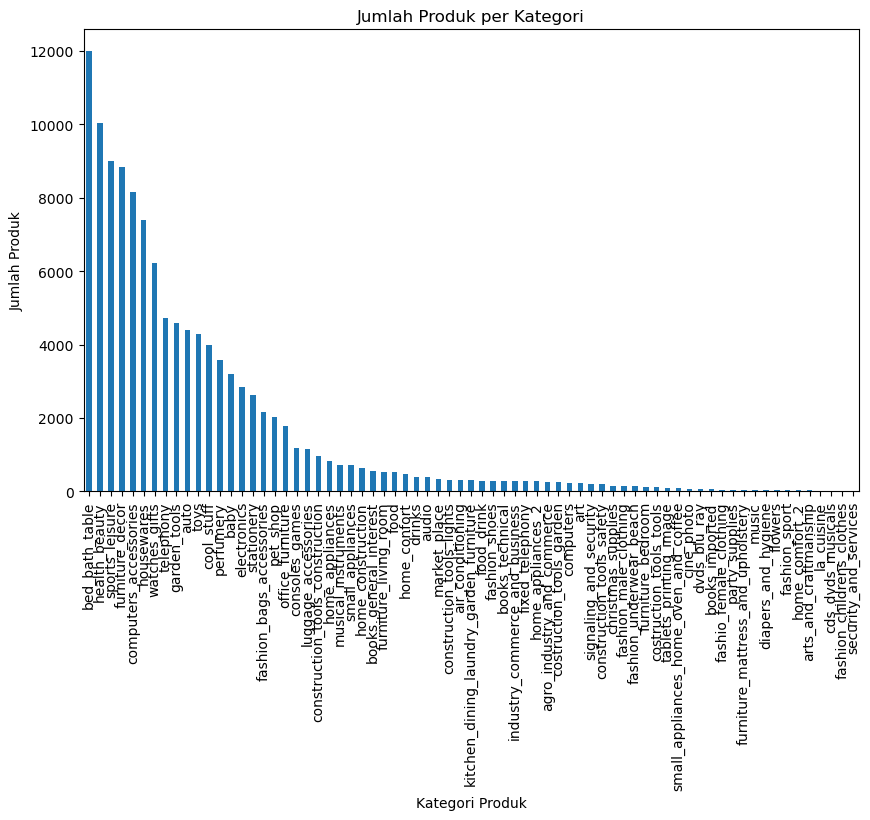

In [148]:
product_category_sales_df.plot(kind='bar', figsize=(10, 6))
plt.title('Jumlah Produk per Kategori')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Produk')
plt.show()

In [149]:
product_category_percent_df = all_df['product_category_name_english'].value_counts(normalize=True) * 100
print('Jumlah Persentase Produk per Kategori:', product_category_percent_df)

Jumlah Persentase Produk per Kategori: product_category_name_english
bed_bath_table               10.283420
health_beauty                 8.605545
sports_leisure                7.723717
furniture_decor               7.576173
computers_accessories         6.991147
                               ...    
arts_and_craftmanship         0.020587
la_cuisine                    0.013725
cds_dvds_musicals             0.012009
fashion_childrens_clothes     0.006862
security_and_services         0.001716
Name: proportion, Length: 71, dtype: float64


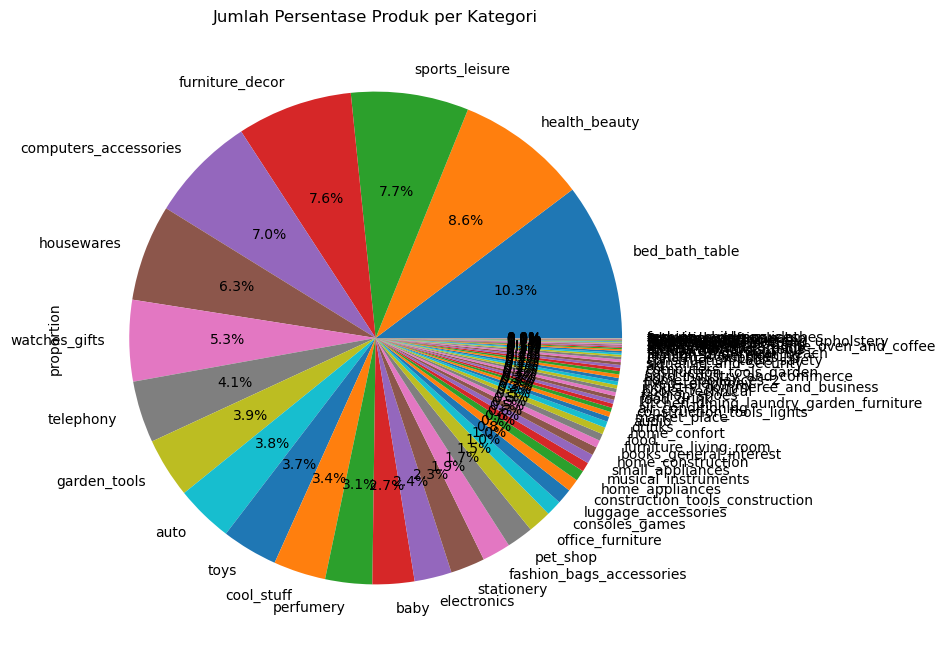

In [150]:
product_category_percent_df.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%')
plt.title('Jumlah Persentase Produk per Kategori')
plt.show()

### Pertanyaan 2: Apakah ada hubungan antara ulasan pelanggan (rating) dengan jumlah produk yang terjual?

In [151]:
product_sales_df = all_df.groupby('review_score')['order_item_id'].count().reset_index()
product_sales_df.columns = ['review_score', 'product_sales']
print(product_sales_df)

   review_score  product_sales
0           1.0          14854
1           2.0           4085
2           3.0           9840
3           4.0          22286
4           5.0          66264


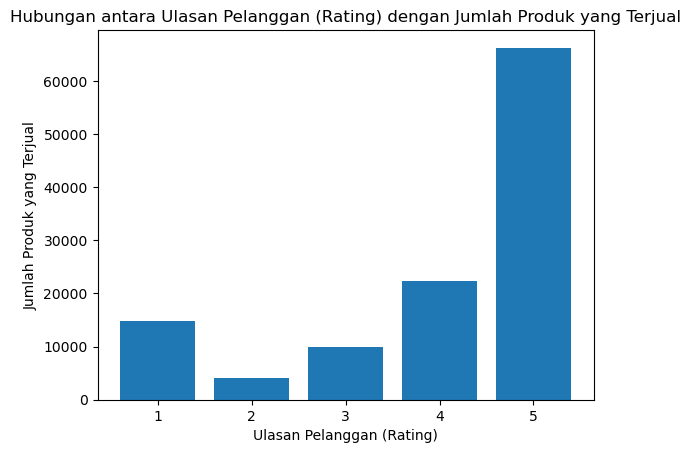

In [152]:
plt.bar(product_sales_df['review_score'], product_sales_df['product_sales'])
plt.title('Hubungan antara Ulasan Pelanggan (Rating) dengan Jumlah Produk yang Terjual')
plt.xlabel('Ulasan Pelanggan (Rating)')
plt.ylabel('Jumlah Produk yang Terjual')
plt.show()

In [153]:
correlation_rating_product = product_sales_df['review_score'].corr(product_sales_df['product_sales'])
print('Korelasi antara Review Score dan Jumlah Produk Terjual', round(correlation_rating_product, 2))

Korelasi antara Review Score dan Jumlah Produk Terjual 0.77


### Pertanyaan 3: Di mana lokasi geografis dengan konsentrai pelanggan tertinggi?

In [154]:
customer_by_state = all_df.groupby('customer_state')['customer_unique_id'].nunique().reset_index()
customer_by_state.columns = ['customer_state', 'customer_count']

customer_by_city = all_df.groupby(['customer_state', 'customer_city'])['customer_unique_id'].nunique().reset_index()
customer_by_city.columns = ['customer_state', 'customer_city', 'customer_count']

In [155]:
top_states = customer_by_state.sort_values(by='customer_count', ascending=False).head(10)
top_cities = customer_by_city.sort_values(by='customer_count', ascending=False).head(10)

print("10 Negara Bagian dengan Konsentrasi Pelanggan Tertinggi:")
print(top_states)

print("\n10 Kota dengan Konsentrasi Pelanggan Tertinggi:")
print(top_cities)

10 Negara Bagian dengan Konsentrasi Pelanggan Tertinggi:
   customer_state  customer_count
25             SP           40302
18             RJ           12384
10             MG           11259
22             RS            5277
17             PR            4882
23             SC            3534
4              BA            3277
6              DF            2075
7              ES            1964
8              GO            1952

10 Kota dengan Konsentrasi Pelanggan Tertinggi:
     customer_state          customer_city  customer_count
4176             SP              sao paulo           14984
2788             RJ         rio de janeiro            6620
1062             MG         belo horizonte            2672
601              DF               brasilia            2069
2406             PR               curitiba            1465
3729             SP               campinas            1398
3208             RS           porto alegre            1326
372              BA               salvador      

C:\Users\acer\AppData\Local\Temp\ipykernel_5760\3667222871.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_states, x='customer_count', y='customer_state', palette='viridis')


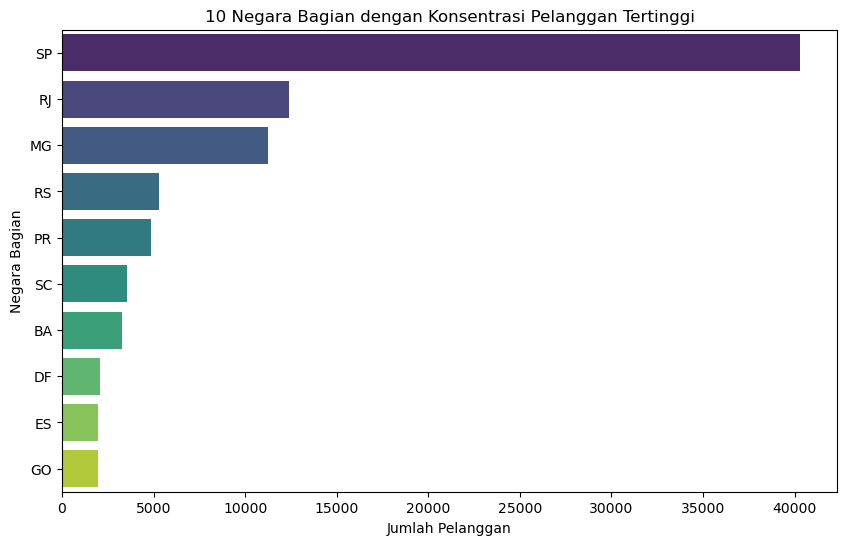

In [156]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_states, x='customer_count', y='customer_state', palette='viridis')
plt.title('10 Negara Bagian dengan Konsentrasi Pelanggan Tertinggi')
plt.xlabel('Jumlah Pelanggan')
plt.ylabel('Negara Bagian')
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_5760\1168390523.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='customer_count', y='customer_city', palette='viridis')


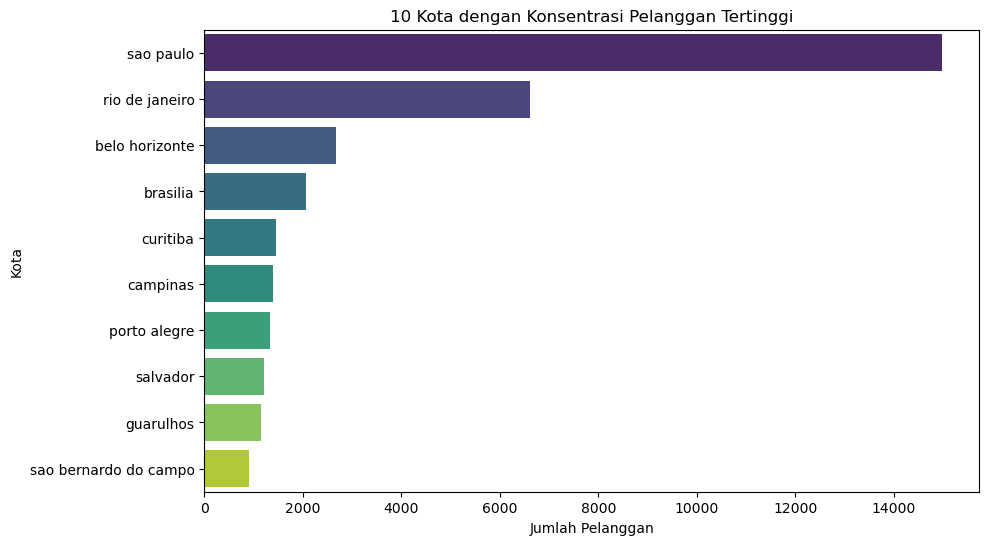

In [157]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_cities, x='customer_count', y='customer_city', palette='viridis')
plt.title('10 Kota dengan Konsentrasi Pelanggan Tertinggi')
plt.xlabel('Jumlah Pelanggan')
plt.ylabel('Kota')
plt.show()

### Insight:
- Berdasarkan visualisasi dan explanatory analysis, produk yang paling banyak dibeli adalah bed_bath_table, diikuti health_beauty, sports_leisure, furniture_decor, dan computers_accessories untuk 5 kategori paling banyak dibeli.
- Terdapat korelasi antara ulasan pelanggan dengan jumlah produk yang terjual.
- Dari analisis yang telah dilakukan, dapat diketahui terdapat negara bagian dan kota yang memiliki pelanggan paling banyak

## Conclusion

1. Produk atau kategori produk apa yang paling laris?
    - Produk atau kategori produk yang paling laris adalah bed_bath_table dengan jumlah penjualan sebesar 11988 unit, yang merupakan 10,28% dari total penjualan.
    - Kategori produk yang paling populer adalah bed_bath_table, health_beauty, sports_leisure, furniture_decor, dan computers_accessories, yang masing-masing memiliki persentase penjualan di atas 6%.
    - Kategori produk yang paling tidak populer adalah security_and_services, fashion_childrens_clothes, cds_dvds_musicals, la_cuisine, dan arts_and_craftmanship, yang masing-masing memiliki persentase penjualan di bawah 1%
2. Apakah ada hubungan antara ulasan pelanggan (rating) dengan jumlah produk yang terjual?
    - Ya, ada hubungan positif antara ulasan pelanggan (rating) dan jumlah produk yang terjual. Nilai korelasi sebesar 0,77 menunjukkan bahwa semakin tinggi rating ulasan, semakin banyak produk yang terjual.
    - Rating ulasan yang lebih tinggi cenderung menginkatkan penjualan produk. Data menunjukkan bahwa produk dengan rating ulasan 5 memiliki penjualan yang paling tinggi, yaitu 66.264 unit.
    - Rating ulasan yang lebih rendah cenderung menurunkan penjualan produk. Data menunjukkan bahwa produk dengan rating ulasan 1 memiliki penjualan yang paling rendah, yaitu 14.854 unit
3. Di mana lokasi geografis dengan konsentrasi pelanggan tertinggi?
    - Negara bagian dengan konsentrasi pelanggan tertinggi adalah SP (São Paulo), dengan jumlah pelanggan sebesar 40.302.
    - Kota dengan konsentrasi pelanggan tertinggi adalah São Paulo, dengan jumlah pelanggan sebesar 14.984.
    - Negara bagian lainnya dengan konsentrasi pelanggan yang signifikan adalah RJ (Rio de Janeiro), MG (Minas Gerais), RS (Rio Grande do Sul), dan PR (Paraná).
    - Kota lainnya dengan konsentrasi pelanggan yang signifikan adalah Rio de Janeiro, Belo Horizonte, Brasília, Curitiba, Campinas, Porto Alegre, Salvador, Guarulhos, dan São Bernardo do Campo.